In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt

In [239]:
train_df=pd.read_csv('train.csv')

In [240]:
train_df['openDate']=pd.to_datetime(train_df['openDate'], format="%Y%m%d")

In [241]:
def split_year(time):
    time = str(time)
    return int(time.split('-')[0])

def split_month(time):
    time = str(time)
    return int(time.split('-')[1])

train_df['Year'] = train_df['openDate'].apply(split_year)
train_df['Month'] = train_df['openDate'].apply(split_month) #year, month 변수 생성 => 개업으로 부터 지난 시간 변수로 합칠 수 있을 듯.

In [242]:
train_df.drop('openDate',axis=1,inplace=True)

In [243]:
train_df['period']=(2022-train_df['Year'])*12+8-train_df['Month']

In [244]:
train_df.drop(['Year','Month'],axis=1,inplace=True)

In [245]:
train_df['OC']=train_df['OC'].replace('open',1)
train_df['OC']=train_df['OC'].replace(' close',0)

In [246]:
train_df['ownerChange']=train_df['ownerChange'].replace('same',0)
train_df['ownerChange']=train_df['ownerChange'].replace('change',1)

In [247]:
#결측치가 많은 행(8개 행) 삭제
train_df=train_df.dropna(subset=['revenue1'])
train_df.reset_index(drop=True, inplace=True)
train_df

,inst_id,OC,sido,sgg,bedCount,instkind,revenue1,salescost1,sga1,salary1,...,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,period
0,1,1,choongnam,73,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,...,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,0.0,176
1,4,1,gyeonggi,89,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,0.0,68
2,7,1,incheon,141,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,...,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,0.0,264
3,9,1,gyeongnam,32,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,...,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,0.0,203
4,11,1,gyeongnam,155,243.0,general_hospital,3.358054e+10,9.222997e+09,2.372791e+10,1.665533e+10,...,2.186113e+10,1.708714e+10,2.000000e+07,0.000000e+00,0.000000e+00,5.879004e+09,397.0,390.0,0.0,243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,422,1,jeonnam,178,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,3.467861e+09,...,2.618201e+09,0.000000e+00,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.0,141.0,0.0,210
289,423,0,choongnam,159,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.0,0.0,98
290,426,0,gyeongbuk,107,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,7.500000e+06,...,2.170973e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,NaN,NaN,NaN,469
291,427,0,gyeonggi,169,180.0,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,2.231944e+09,...,6.400000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,100.0,NaN,NaN,187


In [248]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
sido_cat = ohe.fit_transform(train_df[['sido']])
sido_cat

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [249]:
ohe.categories_

[array(['busan', 'choongbuk', 'choongnam', 'daegu', 'daejeon', 'gangwon',
        'gwangju', 'gyeongbuk', 'gyeonggi', 'gyeongnam', 'incheon',
        'jeonbuk', 'jeonnam', 'sejong', 'seoul', 'ulsan'], dtype=object)]

In [250]:
pd.DataFrame(sido_cat, columns=['sido_' + col for col in ohe.categories_[0]])

,sido_busan,sido_choongbuk,sido_choongnam,sido_daegu,sido_daejeon,sido_gangwon,sido_gwangju,sido_gyeongbuk,sido_gyeonggi,sido_gyeongnam,sido_incheon,sido_jeonbuk,sido_jeonnam,sido_sejong,sido_seoul,sido_ulsan
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
289,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [251]:
train_df=pd.concat([train_df.drop(columns=['sido']),
           pd.DataFrame(sido_cat, columns=['sido_' + col for col in ohe.categories_[0]])], axis=1)
train_df #sido 변수 원핫인코딩 후 train_df에 병합

,inst_id,OC,sgg,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,...,sido_gwangju,sido_gyeongbuk,sido_gyeonggi,sido_gyeongnam,sido_incheon,sido_jeonbuk,sido_jeonnam,sido_sejong,sido_seoul,sido_ulsan
0,1,1,73,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,15652441.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,1,89,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,76156.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,1,141,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,506223059.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,9,1,32,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,112352259.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11,1,155,243.0,general_hospital,3.358054e+10,9.222997e+09,2.372791e+10,1.665533e+10,65414325.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,422,1,178,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,3.467861e+09,42098974.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
289,423,0,159,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,0.000000e+00,186359.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
290,426,0,107,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,7.500000e+06,121022160.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
291,427,0,169,180.0,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,2.231944e+09,123665065.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [252]:
train_df['instkind'].fillna('nan',inplace=True)

In [253]:
ohe = OneHotEncoder(sparse=False)
instkind_cat = ohe.fit_transform(train_df[['instkind']])
instkind_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [254]:
ohe.categories_

[array(['clinic', 'dental_clinic', 'general_hospital', 'hospital', 'nan',
        'nursing_hospital', 'traditional_clinic', 'traditional_hospital'],
       dtype=object)]

In [255]:
ohe.categories_[0]

array(['clinic', 'dental_clinic', 'general_hospital', 'hospital', 'nan',
       'nursing_hospital', 'traditional_clinic', 'traditional_hospital'],
      dtype=object)

In [256]:
instkind_df=pd.DataFrame(instkind_cat, columns=[ 'instkind_' + col for col in ohe.categories_[0]])

In [257]:
instkind_df=instkind_df.drop(columns=['instkind_nan']) #nan 변수 제외

In [258]:
train_df=pd.concat([train_df.drop(columns=['instkind']),
           instkind_df], axis=1) #instkind 원핫인코딩 후 train_df에 병합

In [259]:
train_df.drop('sgg',axis=1,inplace=True)  #시군구 변수 삭제

In [260]:
train_df['employee2'].fillna(train_df['employee1'],inplace=True) #2016/2017 직원 수 같다고 가정

In [261]:
train_df['employee1'].fillna(train_df['employee2'],inplace=True)

In [262]:
with pd.option_context("display.max_columns", 100):
    display(train_df[train_df['employee1'].isnull()])

,inst_id,OC,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,period,sido_busan,sido_choongbuk,sido_choongnam,sido_daegu,sido_daejeon,sido_gangwon,sido_gwangju,sido_gyeongbuk,sido_gyeonggi,sido_gyeongnam,sido_incheon,sido_jeonbuk,sido_jeonnam,sido_sejong,sido_seoul,sido_ulsan,instkind_clinic,instkind_dental_clinic,instkind_general_hospital,instkind_hospital,instkind_nursing_hospital,instkind_traditional_clinic,instkind_traditional_hospital
45,74,1,28.0,8.872427e+09,9.641249e+08,7.638920e+09,4.488958e+09,19153521.0,2.160889e+08,204479315.0,72446781.0,0.000000e+00,1.302115e+09,1.186743e+09,2.671059e+06,97648359.0,8.347311e+09,8.178953e+09,2200500.0,0.0,6.749132e+09,5.759132e+09,4.000000e+09,9.900000e+08,9.900000e+08,2.900294e+09,0.0,8.632333e+09,8.994174e+08,7.616309e+09,4.283771e+09,132492468.0,2.188810e+08,199357358.0,30218421.0,0.000000e+00,1.002794e+09,8.915144e+08,0.000000e+00,80868500.0,8.581435e+09,8.368729e+09,25520500.0,0.0,5.958278e+09,5.956278e+09,4.992758e+09,2.000000e+06,0.000000e+00,3.625952e+09,0.0,NaN,NaN,NaN,340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
88,140,0,203.0,5.423357e+09,0.000000e+00,5.212041e+09,2.958250e+09,23843435.0,1.288886e+08,128638631.0,11620200.0,9.465001e+07,2.851343e+09,2.734711e+09,1.085357e+09,116632010.0,5.453158e+09,5.438850e+09,0.0,0.0,4.457667e+09,1.864667e+09,1.750000e+09,2.590000e+09,2.590000e+09,3.846834e+09,0.0,5.073663e+09,0.000000e+00,4.984086e+09,3.060034e+09,40391187.0,1.292911e+08,128791122.0,10915720.0,-1.023856e+07,1.181463e+09,1.161359e+09,8.314617e+08,20103590.0,5.304341e+09,5.290033e+09,0.0,0.0,2.733619e+09,1.406195e+08,0.000000e+00,2.590000e+09,2.590000e+09,3.752184e+09,0.0,NaN,NaN,NaN,184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
207,306,0,66.0,2.233031e+10,8.484657e+08,1.849255e+10,1.232241e+10,423628901.0,1.304817e+09,417949094.0,415894516.0,1.692204e+09,1.829292e+10,1.818429e+10,3.728960e+09,108635115.0,1.307623e+10,1.265639e+10,312415620.0,0.0,1.582736e+10,1.285973e+10,0.000000e+00,2.967635e+09,0.000000e+00,1.554179e+10,0.0,2.239509e+10,8.492085e+08,1.805503e+10,1.138885e+10,483447584.0,1.574478e+09,571079590.0,553752070.0,1.846078e+09,1.708819e+10,1.701879e+10,3.084699e+09,69397471.0,1.239357e+10,1.173006e+10,310415620.0,0.0,1.563217e+10,1.288180e+10,0.000000e+00,2.750371e+09,0.000000e+00,1.384958e+10,0.0,NaN,NaN,NaN,278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
237,345,1,0.0,6.845503e+08,0.000000e+00,5.619356e+08,3.014000e+08,8067090.0,2.748281e+06,1364824.0,18640111.0,1.092933e+08,1.332665e+09,1.331507e+09,6.243635e+07,0.0,7.721058e+08,5.021058e+08,270000000.0,0.0,9.528087e+07,9.491087e+07,0.000000e+00,3.700000e+05,0.000000e+00,2.009490e+09,0.0,7.745608e+08,0.000000e+00,7.560969e+08,3.638300e+08,15339220.0,4.402666e+06,617047.0,8050806.0,2.134966e+07,1.172968e+09,1.171014e+09,4.916044e+07,0.0,7.968085e+08,5.268085e+08,270000000.0,0.0,6.957960e+07,6.920960e+07,0.000000e+00,3.700000e+05,0.000000e+00,1.900197e+09,0.0,NaN,NaN,NaN,64,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
255,369,1,39.0,3.007769e+09,1.197756e+09,2.258240e+09,1.775322e+09,611489427.0,5.279657e+07,52076570.0,0.0,1.104651e+08,9.443247e+08,8.065135e+08,4.782392e+08,137811283.0,2.105344e+09,1.999416e+09,100700000.0,0.0,1.898375e+09,3.590747e+08,0.000000e+00,1.539300e+09,1.539300e+09,1.151294e+09,359919226.0,2.890536e+09,1.210112e+0

revenue1 – 매출액, 2017(회계년도)년 데이터를 의미함

salescost1 – 매출원가, 2017(회계년도)년 데이터를 의미함

sga1 - 판매비와 관리비, 2017(회계년도)년 데이터를 의미함

salary1 – 급여, 2017(회계년도)년 데이터를 의미함

noi1 – 영업외수익, 2017(회계년도)년 데이터를 의미함

noe1 – 영업외비용, 2017(회계년도)년 데이터를 의미함

Interest1 – 이자비용, 2017(회계년도)년 데이터를 의미함

ctax1 – 법인세비용, 2017(회계년도)년 데이터를 의미함

Profit1 – 당기순이익, 2017(회계년도)년 데이터를 의미함

liquidAsset1 – 유동자산, 2017(회계년도)년 데이터를 의미함

quickAsset1 – 당좌자산, 2017(회계년도)년 데이터를 의미함

receivableS1 - 미수금(단기), 2017(회계년도)년 데이터를 의미함

inventoryAsset1 – 재고자산, 2017(회계년도)년 데이터를 의미함

nonCAsset1 – 비유동자산, 2017(회계년도)년 데이터를 의미함

tanAsset1 – 유형자산, 2017(회계년도)년 데이터를 의미함

OnonCAsset1 - 기타 비유동자산, 2017(회계년도)년 데이터를 의미함

receivableL1 – 장기미수금, 2017(회계년도)년 데이터를 의미함

debt1 – 부채총계, 2017(회계년도)년 데이터를 의미함

liquidLiabilities1 – 유동부채, 2017(회계년도)년 데이터를 의미함

shortLoan1 – 단기차입금, 2017(회계년도)년 데이터를 의미함

NCLiabilities1 – 비유동부채, 2017(회계년도)년 데이터를 의미함

longLoan1 – 장기차입금, 2017(회계년도)년 데이터를 의미함

netAsset1 – 순자산총계, 2017(회계년도)년 데이터를 의미함

surplus1 – 이익잉여금, 2017(회계년도)년 데이터를 의미함

revenue2 – 매출액, 2016(회계년도)년 데이터를 의미함

salescost2 – 매출원가, 2016(회계년도)년 데이터를 의미함

sga2 - 판매비와 관리비, 2016(회계년도)년 데이터를 의미함

salary2 – 급여, 2016(회계년도)년 데이터를 의미함

noi2 – 영업외수익, 2016(회계년도)년 데이터를 의미함

noe2 – 영업외비용, 2016(회계년도)년 데이터를 의미함

interest2 – 이자비용, 2016(회계년도)년 데이터를 의미함

ctax2 – 법인세비용, 2016(회계년도)년 데이터를 의미함

profit2 – 당기순이익, 2016(회계년도)년 데이터를 의미함

liquidAsset2 – 유동자산, 2016(회계년도)년 데이터를 의미함

quickAsset2 – 당좌자산, 2016(회계년도)년 데이터를 의미함

receivableS2 - 미수금(단기), 2016(회계년도)년 데이터를 의미함

inventoryAsset2 – 재고자산, 2016(회계년도)년 데이터를 의미함

nonCAsset2 – 비유동자산, 2016(회계년도)년 데이터를 의미함

tanAsset2 – 유형자산, 2016(회계년도)년 데이터를 의미함

OnonCAsset2 - 기타 비유동자산, 2016(회계년도)년 데이터를 의미함

receivableL2 – 장기미수금, 2016(회계년도)년 데이터를 의미함

Debt2 – 부채총계, 2016(회계년도)년 데이터를 의미함

liquidLiabilities2 – 유동부채, 2016(회계년도)년 데이터를 의미함

shortLoan2 – 단기차입금, 2016(회계년도)년 데이터를 의미함

NCLiabilities2 – 비유동부채, 2016(회계년도)년 데이터를 의미함

longLoan2 – 장기차입금, 2016(회계년도)년 데이터를 의미함

netAsset2 – 순자산총계, 2016(회계년도)년 데이터를 의미함

surplus2 – 이익잉여금, 2016(회계년도)년 데이터를 의미함

employee1 – 고용한 총 직원의 수, 2017(회계년도)년 데이터를 의미함

employee2 – 고용한 총 직원의 수, 2016(회계년도)년 데이터를 의미함

ownerChange – 대표자의 변동

In [263]:
train_df['매출액증가율']=train_df['revenue1']/train_df['revenue2']-1
train_df['총자산증가율']=train_df['netAsset1']/train_df['netAsset2']-1


train_df['매출액순이익률_17']=train_df['profit1']/train_df['revenue1']
train_df['매출액순이익률_16']=train_df['profit2']/train_df['revenue2']

train_df['총자본순이익률_17']=train_df['profit1']/train_df['netAsset1']
train_df['총자본순이익률_16']=train_df['profit2']/train_df['netAsset2']

train_df['유동비율_17']=train_df['liquidAsset1']/train_df['liquidLiabilities1']
train_df['유동비율_16']=train_df['liquidAsset2']/train_df['liquidLiabilities2']

train_df['부채비율_17']=train_df['debt1']/train_df['netAsset1']
train_df['부채비율_16']=train_df['debt2']/train_df['netAsset2']

train_df['총자본회전율_17']=train_df['revenue1']/train_df['netAsset1']
train_df['총자본회전율_16']=train_df['revenue2']/train_df['netAsset2']

train_df['유동자산집중도_17']=train_df['liquidAsset1']/train_df['revenue1']
train_df['유동자산집중도_16']=train_df['liquidAsset2']/train_df['revenue2']

train_df['유동자산구성률_17']=train_df['liquidAsset1']/train_df['netAsset1']
train_df['유동자산구성률_16']=train_df['liquidAsset2']/train_df['netAsset2']

train_df['당좌비율_17']=train_df['quickAsset1']/train_df['liquidLiabilities1']
train_df['당좌비율_16']=train_df['quickAsset2']/train_df['liquidLiabilities2']

train_df['재고자산회전율_17']=train_df['revenue1']/train_df['inventoryAsset1']
train_df['재고자산회전율_16']=train_df['revenue2']/train_df['inventoryAsset2']

In [264]:
train_fnc=train_df.drop(['revenue1','revenue2','netAsset1', 'netAsset2', 'profit1', 'profit2', 'liquidAsset1', 'liquidAsset2', 'liquidLiabilities1', 'liquidLiabilities2', 'debt1', 'debt2', 'quickAsset1', 'quickAsset2', 'inventoryAsset1', 'inventoryAsset2'],axis=1)

In [224]:
train_fnc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   inst_id                        293 non-null    int64  
 1   OC                             293 non-null    int64  
 2   bedCount                       288 non-null    float64
 3   salescost1                     293 non-null    float64
 4   sga1                           293 non-null    float64
 5   salary1                        293 non-null    float64
 6   noi1                           293 non-null    float64
 7   noe1                           293 non-null    float64
 8   interest1                      293 non-null    float64
 9   ctax1                          293 non-null    float64
 10  receivableS1                   293 non-null    float64
 11  nonCAsset1                     293 non-null    float64
 12  tanAsset1                      293 non-null    flo

In [265]:
train_fnc.columns

Index(['inst_id', 'OC', 'bedCount', 'salescost1', 'sga1', 'salary1', 'noi1',
       'noe1', 'interest1', 'ctax1', 'receivableS1', 'nonCAsset1', 'tanAsset1',
       'OnonCAsset1', 'receivableL1', 'shortLoan1', 'NCLiabilities1',
       'longLoan1', 'surplus1', 'salescost2', 'sga2', 'salary2', 'noi2',
       'noe2', 'interest2', 'ctax2', 'receivableS2', 'nonCAsset2', 'tanAsset2',
       'OnonCAsset2', 'receivableL2', 'shortLoan2', 'NCLiabilities2',
       'longLoan2', 'surplus2', 'employee1', 'employee2', 'ownerChange',
       'period', 'sido_busan', 'sido_choongbuk', 'sido_choongnam',
       'sido_daegu', 'sido_daejeon', 'sido_gangwon', 'sido_gwangju',
       'sido_gyeongbuk', 'sido_gyeonggi', 'sido_gyeongnam', 'sido_incheon',
       'sido_jeonbuk', 'sido_jeonnam', 'sido_sejong', 'sido_seoul',
       'sido_ulsan', 'instkind_clinic', 'instkind_dental_clinic',
       'instkind_general_hospital', 'instkind_hospital',
       'instkind_nursing_hospital', 'instkind_traditional_clinic',
       

In [266]:
train_fnc['매출액증가율']

0     -0.018688
1           inf
2      0.084492
3      0.019981
4     -0.021958
         ...   
288    0.077224
289         inf
290   -1.000000
291   -0.483291
292   -0.105430
Name: 매출액증가율, Length: 293, dtype: float64

In [267]:
max(train_fnc['매출액증가율'][np.isfinite(train_fnc['매출액증가율']) == True])

26.66719893398877

In [268]:
min(train_fnc['매출액증가율'][np.isfinite(train_fnc['매출액증가율']) == True])

-1.0

In [269]:
np.nan_to_num(train_fnc['매출액증가율'], nan=0, posinf=max(train_fnc['매출액증가율'][np.isfinite(train_fnc['매출액증가율']) == True]), neginf=min(train_fnc['매출액증가율'][np.isfinite(train_fnc['매출액증가율']) == True]), copy=False)

array([-1.86880121e-02,  2.66671989e+01,  8.44921666e-02,  1.99808861e-02,
       -2.19578247e-02,  5.21270000e-02,  8.17315353e-02, -5.94228342e-03,
       -9.95043451e-02,  6.83837326e-02,  2.66671989e+01,  3.63714459e-02,
        6.06118671e-02,  1.69811321e-01,  6.83699771e-02,  7.43726806e-02,
        5.01354328e-01,  4.30901818e-02, -1.26710628e-02,  2.07353027e-02,
       -1.38426263e-01,  1.68504244e-01,  6.64710674e-03,  5.23920214e-02,
        1.03958738e-01,  3.25415860e-02,  4.53606781e-02, -3.73554223e-02,
        1.15874321e-01, -9.39156463e-02, -2.09635171e-04, -1.39776070e-02,
        2.81221347e-01,  1.73786255e-02, -1.31794707e-04, -1.84071150e-02,
        1.10294118e-01,  2.18352815e-03,  3.72445117e-02,  3.17941207e-03,
        8.28257423e-03, -2.82890319e-02,  3.71146134e-03,  1.59429652e-02,
       -5.88335257e-02,  2.78132755e-02,  3.45082086e-02,  2.00275537e-01,
        5.13867325e-02,  1.28525029e-01, -6.93684417e-03,  2.66671989e+01,
        2.61599143e-02,  

In [270]:
train_fnc['매출액증가율']=np.nan_to_num(train_fnc['매출액증가율'], nan=0, posinf=max(train_fnc['매출액증가율'][np.isfinite(train_fnc['매출액증가율']) == True]), neginf=min(train_fnc['매출액증가율'][np.isfinite(train_fnc['매출액증가율']) == True]), copy=False)
train_fnc['매출액순이익률_16']=np.nan_to_num(train_fnc['매출액순이익률_16'], nan=0, posinf=max(train_fnc['매출액순이익률_16'][np.isfinite(train_fnc['매출액순이익률_16']) == True]), neginf=min(train_fnc['매출액순이익률_16'][np.isfinite(train_fnc['매출액순이익률_16']) == True]), copy=False)
train_fnc['총자본순이익률_16']=np.nan_to_num(train_fnc['총자본순이익률_16'], nan=0, posinf=max(train_fnc['총자본순이익률_16'][np.isfinite(train_fnc['총자본순이익률_16']) == True]), neginf=min(train_fnc['총자본순이익률_16'][np.isfinite(train_fnc['총자본순이익률_16']) == True]), copy=False)
train_fnc['유동비율_17']=np.nan_to_num(train_fnc['유동비율_17'], nan=0, posinf=max(train_fnc['유동비율_17'][np.isfinite(train_fnc['유동비율_17']) == True]), neginf=min(train_fnc['유동비율_17'][np.isfinite(train_fnc['유동비율_17']) == True]), copy=False)
train_fnc['유동비율_16']=np.nan_to_num(train_fnc['유동비율_16'], nan=0, posinf=max(train_fnc['유동비율_16'][np.isfinite(train_fnc['유동비율_16']) == True]), neginf=min(train_fnc['유동비율_16'][np.isfinite(train_fnc['유동비율_16']) == True]), copy=False)
train_fnc['부채비율_17']=np.nan_to_num(train_fnc['부채비율_17'], nan=0, posinf=max(train_fnc['부채비율_17'][np.isfinite(train_fnc['부채비율_17']) == True]), neginf=min(train_fnc['부채비율_17'][np.isfinite(train_fnc['부채비율_17']) == True]), copy=False)
train_fnc['부채비율_16']=np.nan_to_num(train_fnc['부채비율_16'], nan=0, posinf=max(train_fnc['부채비율_16'][np.isfinite(train_fnc['부채비율_16']) == True]), neginf=min(train_fnc['부채비율_16'][np.isfinite(train_fnc['부채비율_16']) == True]), copy=False)
train_fnc['총자본회전율_17']=np.nan_to_num(train_fnc['총자본회전율_17'], nan=0, posinf=max(train_fnc['총자본회전율_17'][np.isfinite(train_fnc['총자본회전율_17']) == True]), neginf=min(train_fnc['총자본회전율_17'][np.isfinite(train_fnc['총자본회전율_17']) == True]), copy=False)
train_fnc['총자본회전율_16']=np.nan_to_num(train_fnc['총자본회전율_16'], nan=0, posinf=max(train_fnc['총자본회전율_16'][np.isfinite(train_fnc['총자본회전율_16']) == True]), neginf=min(train_fnc['총자본회전율_16'][np.isfinite(train_fnc['총자본회전율_16']) == True]), copy=False)
train_fnc['총자산증가율']=np.nan_to_num(train_fnc['총자산증가율'], nan=0, posinf=max(train_fnc['총자산증가율'][np.isfinite(train_fnc['총자산증가율']) == True]), neginf=min(train_fnc['총자산증가율'][np.isfinite(train_fnc['총자산증가율']) == True]), copy=False)
train_fnc['유동자산집중도_17']=np.nan_to_num(train_fnc['유동자산집중도_17'], nan=0, posinf=max(train_fnc['유동자산집중도_17'][np.isfinite(train_fnc['유동자산집중도_17']) == True]), neginf=min(train_fnc['유동자산집중도_17'][np.isfinite(train_fnc['유동자산집중도_17']) == True]), copy=False)
train_fnc['유동자산집중도_16']=np.nan_to_num(train_fnc['유동자산집중도_16'], nan=0, posinf=max(train_fnc['유동자산집중도_16'][np.isfinite(train_fnc['유동자산집중도_16']) == True]), neginf=min(train_fnc['유동자산집중도_16'][np.isfinite(train_fnc['유동자산집중도_16']) == True]), copy=False)
train_fnc['유동자산구성률_17']=np.nan_to_num(train_fnc['유동자산구성률_17'], nan=0, posinf=max(train_fnc['유동자산구성률_17'][np.isfinite(train_fnc['유동자산구성률_17']) == True]), neginf=min(train_fnc['유동자산구성률_17'][np.isfinite(train_fnc['유동자산구성률_17']) == True]), copy=False)
train_fnc['유동자산구성률_16']=np.nan_to_num(train_fnc['유동자산구성률_16'], nan=0, posinf=max(train_fnc['유동자산구성률_16'][np.isfinite(train_fnc['유동자산구성률_16']) == True]), neginf=min(train_fnc['유동자산구성률_16'][np.isfinite(train_fnc['유동자산구성률_16']) == True]), copy=False)
train_fnc['당좌비율_17']=np.nan_to_num(train_fnc['당좌비율_17'], nan=0, posinf=max(train_fnc['당좌비율_17'][np.isfinite(train_fnc['당좌비율_17']) == True]), neginf=min(train_fnc['당좌비율_17'][np.isfinite(train_fnc['당좌비율_17']) == True]), copy=False)
train_fnc['당좌비율_16']=np.nan_to_num(train_fnc['당좌비율_16'], nan=0, posinf=max(train_fnc['당좌비율_16'][np.isfinite(train_fnc['당좌비율_16']) == True]), neginf=min(train_fnc['당좌비율_16'][np.isfinite(train_fnc['당좌비율_16']) == True]), copy=False)
train_fnc['재고자산회전율_17']=np.nan_to_num(train_fnc['재고자산회전율_17'], nan=0, posinf=max(train_fnc['재고자산회전율_17'][np.isfinite(train_fnc['재고자산회전율_17']) == True]), neginf=min(train_fnc['재고자산회전율_17'][np.isfinite(train_fnc['재고자산회전율_17']) == True]), copy=False)
train_fnc['재고자산회전율_16']=np.nan_to_num(train_fnc['재고자산회전율_16'], nan=0, posinf=max(train_fnc['재고자산회전율_16'][np.isfinite(train_fnc['재고자산회전율_16']) == True]), neginf=min(train_fnc['재고자산회전율_16'][np.isfinite(train_fnc['재고자산회전율_16']) == True]), copy=False)


In [271]:
train_fnc['매출액순이익률_17']=np.nan_to_num(train_fnc['매출액순이익률_17'], nan=0, posinf=max(train_fnc['매출액순이익률_17'][np.isfinite(train_fnc['매출액순이익률_17']) == True]), neginf=min(train_fnc['매출액순이익률_17'][np.isfinite(train_fnc['매출액순이익률_17']) == True]), copy=False)
train_fnc['총자본순이익률_17']=np.nan_to_num(train_fnc['총자본순이익률_17'], nan=0, posinf=max(train_fnc['총자본순이익률_17'][np.isfinite(train_fnc['총자본순이익률_17']) == True]), neginf=min(train_fnc['총자본순이익률_17'][np.isfinite(train_fnc['총자본순이익률_17']) == True]), copy=False)


In [272]:
train_fnc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   inst_id                        293 non-null    int64  
 1   OC                             293 non-null    int64  
 2   bedCount                       288 non-null    float64
 3   salescost1                     293 non-null    float64
 4   sga1                           293 non-null    float64
 5   salary1                        293 non-null    float64
 6   noi1                           293 non-null    float64
 7   noe1                           293 non-null    float64
 8   interest1                      293 non-null    float64
 9   ctax1                          293 non-null    float64
 10  receivableS1                   293 non-null    float64
 11  nonCAsset1                     293 non-null    float64
 12  tanAsset1                      293 non-null    flo

In [273]:
with pd.option_context("display.min_rows", 100):
    display(train_fnc.max())

inst_id                          4.280000e+02
OC                               1.000000e+00
bedCount                         6.560000e+02
salescost1                       9.850332e+10
sga1                             1.030000e+11
salary1                          6.403559e+10
noi1                             9.144171e+09
noe1                             8.686380e+09
interest1                        2.841475e+09
ctax1                            2.808883e+09
receivableS1                     1.409257e+10
nonCAsset1                       1.560000e+11
tanAsset1                        1.560000e+11
OnonCAsset1                      1.008517e+10
receivableL1                     7.374231e+07
shortLoan1                       1.988520e+10
NCLiabilities1                   5.501736e+10
longLoan1                        4.112490e+10
surplus1                         1.340000e+11
salescost2                       8.658159e+10
sga2                             9.837840e+10
salary2                          6

In [274]:
from numpy import *
for col in['salescost1', 'sga1', 'salary1',
       'noi1', 'noe1', 'interest1', 'ctax1', 'receivableS1', 'nonCAsset1',
       'tanAsset1', 'OnonCAsset1', 'receivableL1', 'shortLoan1',
       'NCLiabilities1', 'longLoan1', 'surplus1', 'salescost2', 'sga2',
       'salary2', 'noi2', 'noe2', 'interest2', 'ctax2', 'receivableS2',
       'nonCAsset2', 'tanAsset2', 'OnonCAsset2', 'receivableL2', 'shortLoan2',
       'NCLiabilities2', 'longLoan2', 'surplus2',
       '매출액증가율', '매출액순이익률_17', '매출액순이익률_16', '총자본순이익률_17', '총자본순이익률_16',
       '유동비율_17', '유동비율_16', '부채비율_17', '부채비율_16', '총자본회전율_17', '총자본회전율_16',
       '총자산증가율', '유동자산집중도_17', '유동자산집중도_16', '유동자산구성률_17', '유동자산구성률_16',
       '당좌비율_17', '당좌비율_16', '재고자산회전율_17', '재고자산회전율_16']:
    train_fnc[col]=(train_fnc[col]-mean(train_fnc[col]))/std(train_fnc[col])

In [275]:
from sklearn.impute import KNNImputer

In [276]:
train_df['ownerChange']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
288    0.0
289    0.0
290    NaN
291    NaN
292    0.0
Name: ownerChange, Length: 293, dtype: float64

In [277]:
train_fnc['ownerChange']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
288    0.0
289    0.0
290    NaN
291    NaN
292    0.0
Name: ownerChange, Length: 293, dtype: float64

In [193]:
train_knn['ownerChange']

0      0.540564
1      0.158469
2     -0.297028
3     -0.342427
4     -0.326627
         ...   
288   -0.047308
289   -0.382526
290   -0.036401
291   -0.262028
292   -0.344391
Name: ownerChange, Length: 293, dtype: object

In [144]:
train_df=train_df.astype({'OC':'category'})
train_df=train_df.astype({'ownerChange':'category'})

In [145]:
train_fnc=train_fnc.astype({'OC':'category'})
train_fnc=train_fnc.astype({'ownerChange':'category'})

train_df=train_fnc.drop(['bedCount','employee1','employee2'],axis=1) #결측치 있는 변수 제외하고 knnimputer 적용

In [278]:
train_knn=train_fnc.drop(['bedCount','employee1','employee2'],axis=1) #결측치 있는 변수 제외하고 knnimputer 적용

In [279]:
train_knn=imputer.fit_transform(train_knn)
train_knn=pd.DataFrame(train_knn)
with pd.option_context("display.max_columns", 100):
    display(train_knn)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78
0,1.0,1.0,-0.270546,-0.427222,-0.448635,-0.317057,-0.468889,-0.635192,-0.188695,-0.156610,-0.520741,-0.519991,-0.211059,-0.058521,-0.551330,-0.523603,-0.489511,0.027988,-0.273606,-0.381118,-0.400256,-0.391571,-0.474832,-0.587340,-0.204237,-0.059614,-0.479986,-0.478234,-0.202288,-0.058521,-0.512165,-0.514632,-0.509191,0.062510,0.0,176.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.279275,-0.207676,0.159384,0.207565,-0.001910,-0.043564,0.540564,0.456917,-0.124534,-0.103470,-0.344597,-0.337885,-0.248919,-0.327910,-0.166968,-0.146760,0.537473,0.453699,-0.435424,-0.377837
1,4.0,1.0,-0.201331,-0.662844,-0.663943,-0.336503,-0.483254,-0.683606,-0.316188,-0.474579,-0.660944,-0.662512,-0.364589,-0.058521,-0.551330,-0.585065,-0.564359,-0.153740,-0.273606,-0.681610,-0.679377,-0.422326,-0.501605,-0.645657,-0.281816,-0.420101,-0.634724,-0.635308,-0.368661,-0.058521,-0.512165,-0.584744,-0.594788,-0.209073,0.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.790260,3.790328,0.148092,0.091545,0.052483,-0.075120,0.158469,-0.506136,-0.123382,-0.103781,-0.333763,-0.338511,-0.156264,-0.935456,-0.114033,-0.149298,0.130095,-0.498030,-0.686833,-0.678026
2,7.0,1.0,-0.270546,4.046372,3.238344,0.295391,0.706596,3.694191,0.383973,-0.480151,1.860666,1.767786,3.857867,-0.058521,5.684066,1.249462,0.982296,0.895982,-0.273606,4.126675,3.338993,0.483184,0.707096,4.104372,0.621066,-0.420101,1.769056,1.659053,4.096784,-0.058521,2.614795,2.127139,2.719372,1.444671,0.0,264.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.263540,-0.210673,0.119915,0.121631,-0.014577,-0.049381,-0.297028,-0.337110,-0.076420,-0.100650,-0.322755,-0.336541,-0.428431,-0.412053,-0.110712,-0.142421,-0.299853,-0.347063,-0.692840,-0.626613
3,9.0,1.0,-0.270546,2.502698,2.330576,-0.196333,0.857292,4.097879,-0.316188,2.341428,1.889243,2.084954,-0.126625,-0.058521,5.071093,2.094100,2.314412,0.942360,-0.273606,2.808526,2.493523,0.712863,0.857494,4.373696,-0.281816,1.896331,2.190975,2.368225,0.531452,-0.058521,5.455120,2.208692,2.501653,1.719138,0.0,203.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.273378,2.450670,0.109498,0.093174,0.772504,2.258915,-0.342427,-0.463949,9.744983,9.831365,2.956488,2.960834,-0.580556,-0.614482,6.835546,6.914880,-0.338353,-0.459469,-0.623779,-0.574875
4,11.0,1.0,0.967850,0.898220,1.363302,-0.254932,0.216975,0.547062,-0.316188,-0.023474,0.424163,0.506751,-0.218542,-0.058521,4.835963,-0.585065,-0.564359,0.291343,1.187799,1.102956,1.537041,-0.183644,-0.099723,0.899398,-0.281816,-0.284073,0.708985,0.803689,-0.150805,-0.058521,5.283291,-0.582129,-0.594788,1.046912,0.0,243.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.279773,-0.223510,0.106583,0.096764,-3.981613,2.258915,-0.326627,-0.448545,-0.128634,-0.103781,2.956488,2.960834,-0.464351,-0.489378,6.835546,6.914880,-0.321186,-0.441874,-0.503811,-0.450862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,422.0,1.0,-0.214777,-0.297004,-0.270927,-0.284040,0.219499,0.002486,-0.316188,0.756811,0.029628,0.075364,-0.236310,-0.058521,-0.551330,0.333399,0.700168,0.017014,-0.213335,-0.181324,-0.169637,-0.250802,-0.314980,0.085613,-0.068942,0.930906,0.109343,0.161474,-0.281019,-0.058521,-0.512165,0.305280,0.706733,-0.035675,0.0,210.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,

In [281]:
train_fnc.iloc[:,37]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
288    0.0
289    0.0
290    NaN
291    NaN
292    0.0
Name: ownerChange, Length: 293, dtype: float64

In [286]:
with pd.option_context("display.min_rows", 300):
    display(train_knn.iloc[:,34].value_counts())

0.0    250
1.0     43
Name: 34, dtype: int64

In [284]:
train_knn.iloc[:,34]=train_knn.iloc[:,34].replace(0.1,0)
train_knn.iloc[:,34]=train_knn.iloc[:,34].replace(0.4,0)
train_knn.iloc[:,34]=train_knn.iloc[:,34].replace(0.5,1)

In [287]:
train_knn.info() #ownerChange 결측치 채워짐

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 79 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       293 non-null    float64
 1   1       293 non-null    float64
 2   2       293 non-null    float64
 3   3       293 non-null    float64
 4   4       293 non-null    float64
 5   5       293 non-null    float64
 6   6       293 non-null    float64
 7   7       293 non-null    float64
 8   8       293 non-null    float64
 9   9       293 non-null    float64
 10  10      293 non-null    float64
 11  11      293 non-null    float64
 12  12      293 non-null    float64
 13  13      293 non-null    float64
 14  14      293 non-null    float64
 15  15      293 non-null    float64
 16  16      293 non-null    float64
 17  17      293 non-null    float64
 18  18      293 non-null    float64
 19  19      293 non-null    float64
 20  20      293 non-null    float64
 21  21      293 non-null    float64
 22  22

In [288]:
train_fnc['ownerChange']=train_knn.iloc[:,34] #knnimputer 적용한 데이터 넣어줌

In [45]:
train_df['ownerChange']=train_df['ownerChange'].astype('int')

In [289]:
train_fnc['ownerChange']=train_fnc['ownerChange'].astype('int')

In [46]:
train_df=train_df.astype({'ownerChange':'category'})

In [290]:
train_fnc=train_fnc.astype({'ownerChange':'category'})

! knnimputer 사용 전 scaling을 안한 거 같음

In [145]:
from impyute.imputation.cs import mice
np_imputed=mice(train_df.values) 
train_imputed = pd.DataFrame(np_imputed) #mice 이용해 bedCount, employee1, employee2 결측치 처리

C:\Users\ynjn\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ynjn\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [146]:
train_fnc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   inst_id                        293 non-null    int64   
 1   OC                             293 non-null    category
 2   sgg                            293 non-null    int64   
 3   bedCount                       288 non-null    float64 
 4   salescost1                     293 non-null    float64 
 5   sga1                           293 non-null    float64 
 6   salary1                        293 non-null    float64 
 7   noi1                           293 non-null    float64 
 8   noe1                           293 non-null    float64 
 9   interest1                      293 non-null    float64 
 10  ctax1                          293 non-null    float64 
 11  receivableS1                   293 non-null    float64 
 12  nonCAsset1                     293 n

In [291]:
from impyute.imputation.cs import mice
np_imputed=mice(train_fnc.values) 
train_imputed = pd.DataFrame(np_imputed) #mice 이용해 bedCount, employee1, employee2 결측치 처리

In [292]:
with pd.option_context("display.max_columns", 100):
    display(train_fnc[train_fnc['bedCount'].isnull()])

,inst_id,OC,bedCount,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,receivableS1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,shortLoan1,NCLiabilities1,longLoan1,surplus1,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,receivableS2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,shortLoan2,NCLiabilities2,longLoan2,surplus2,employee1,employee2,ownerChange,period,sido_busan,sido_choongbuk,sido_choongnam,sido_daegu,sido_daejeon,sido_gangwon,sido_gwangju,sido_gyeongbuk,sido_gyeonggi,sido_gyeongnam,sido_incheon,sido_jeonbuk,sido_jeonnam,sido_sejong,sido_seoul,sido_ulsan,instkind_clinic,instkind_dental_clinic,instkind_general_hospital,instkind_hospital,instkind_nursing_hospital,instkind_traditional_clinic,instkind_traditional_hospital,매출액증가율,총자산증가율,매출액순이익률_17,매출액순이익률_16,총자본순이익률_17,총자본순이익률_16,유동비율_17,유동비율_16,부채비율_17,부채비율_16,총자본회전율_17,총자본회전율_16,유동자산집중도_17,유동자산집중도_16,유동자산구성률_17,유동자산구성률_16,당좌비율_17,당좌비율_16,재고자산회전율_17,재고자산회전율_16
66,107,0,NaN,-0.251263,-0.456191,-0.428286,-0.265899,-0.267713,-0.268102,-0.226652,-0.480151,-0.459889,-0.495223,0.199637,-0.058521,0.260816,-0.583781,-0.564359,-0.153740,-0.252172,-0.460756,-0.448202,-0.311714,-0.354712,-0.306101,-0.226748,-0.420101,-0.425128,-0.452418,0.099453,-0.058521,0.316412,-0.581399,-0.594788,-0.209073,85.0,74.0,0,276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.239027,-0.206264,0.169830,0.143690,0.014703,-0.063591,-0.253066,-0.339708,-0.111033,-0.102633,-0.344388,-0.338002,0.456884,0.670933,-0.131550,-0.143843,-0.246256,-0.331644,-0.107751,-0.300636
188,281,0,NaN,-0.267537,-0.661486,-0.669090,-0.319805,-0.398139,-0.668099,-0.316188,-0.480151,-0.668000,-0.670177,-0.364589,-0.058521,-0.551330,-0.585065,-0.564359,-0.153740,-0.264047,-0.617225,-0.587988,-0.422324,-0.479892,-0.623607,-0.281816,-0.420101,-0.634724,-0.635308,-0.368661,-0.058521,-0.512165,-0.584744,-0.594788,-0.209073,15.0,15.0,1,116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.341745,-0.223510,-0.716361,-1.811255,-3.981613,-4.314808,-0.382526,-0.506136,-0.128634,-0.103781,2.956488,2.960834,-0.964315,-0.935456,-0.201198,-0.149298,-0.375795,-0.498030,1.954735,2.086626
289,423,0,NaN,0.830490,-0.692832,-0.700674,-0.336366,-0.351168,-0.209215,-0.316188,-0.480151,-0.668000,-0.670177,-0.364589,-0.058521,-0.551330,-0.585065,-0.564359,-0.153740,-0.273606,-0.681610,-0.679377,-0.422326,-0.501605,-0.645657,-0.281816,-0.420101,-0.634724,-0.635308,-0.368661,-0.058521,-0.512165,-0.584744,-0.594788,-0.209073,79.0,79.0,0,98,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.790260,-0.223510,-0.124975,0.091545,-3.981613,-0.075120,-0.382526,-0.506136,-0.128634,-0.103781,2.956488,-0.338511,-0.964315,-0.935456,-0.201198,-0.149298,-0.375795,-0.498030,1.954735,-0.678026
290,426,0,NaN,-0.270546,-0.689157,-0.699745,-0.185509,-0.352935,-0.178917,-0.316188,0.299224,-0.341831,-0.325373,-0.291856,-0.058521,-0.551330,-0.049061,-0.031520,-0.153740,0.167705,-0.655469,-0.659368,-0.093378,-0.382791,-0.244166,-0.281816,0.359319,-0.297410,-0.278556,-0.308272,-0.058521,-0.512165,-0.035588,-0.046361,-0.209073,NaN,NaN,0,469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.428922,-0.227565,-8.366534,-0.024754,-0.093849,-0.093646,-0.036401,-0.020868,-0.095148,-0.101681,-0.353234,-0.338144,5.973408,3.156222,-0.084548,-0.139287,-0.028195,-0.011059,-0.746110,-0.061469
292,428,1,NaN,-0.161672,-0.659014,-0.684329,-0.333772,-0.413793,-0.414553,-0.316188,-0.469511,-0.067928,-0.026364,-0.271550,-0.058521,-0.551330,-0.300294,-0.097359,0.607647,-0.149910,-0.642695,-0.661343,-0.414156,-0.417320,-0.294801,-0.281816,-0.409462,-0.003882,0.040123,-0.269531,-0.058521,-0.512165,-0.293640,-0.114125,1.130325,15.0,15.0,0,250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.292503,-0.225024,0.075190,0.172625,-0.080988,-0.071481,-0.344391,-0.464994,-0.1117

In [293]:
with pd.option_context("display.max_columns", 100):
    display(train_imputed.loc[[66,188,289,290,292]])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81
66,107.0,0.0,178.833413,-0.251263,-0.456191,-0.428286,-0.265899,-0.267713,-0.268102,-0.226652,-0.480151,-0.459889,-0.495223,0.199637,-0.058521,0.260816,-0.583781,-0.564359,-0.153740,-0.252172,-0.460756,-0.448202,-0.311714,-0.354712,-0.306101,-0.226748,-0.420101,-0.425128,-0.452418,0.099453,-0.058521,0.316412,-0.581399,-0.594788,-0.209073,85.000000,74.000000,0.0,276.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.239027,-0.206264,0.169830,0.143690,0.014703,-0.063591,-0.253066,-0.339708,-0.111033,-0.102633,-0.344388,-0.338002,0.456884,0.670933,-0.131550,-0.143843,-0.246256,-0.331644,-0.107751,-0.300636
188,281.0,0.0,147.472427,-0.267537,-0.661486,-0.669090,-0.319805,-0.398139,-0.668099,-0.316188,-0.480151,-0.668000,-0.670177,-0.364589,-0.058521,-0.551330,-0.585065,-0.564359,-0.153740,-0.264047,-0.617225,-0.587988,-0.422324,-0.479892,-0.623607,-0.281816,-0.420101,-0.634724,-0.635308,-0.368661,-0.058521,-0.512165,-0.584744,-0.594788,-0.209073,15.000000,15.000000,1.0,116.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.341745,-0.223510,-0.716361,-1.811255,-3.981613,-4.314808,-0.382526,-0.506136,-0.128634,-0.103781,2.956488,2.960834,-0.964315,-0.935456,-0.201198,-0.149298,-0.375795,-0.498030,1.954735,2.086626
289,423.0,0.0,294.053979,0.830490,-0.692832,-0.700674,-0.336366,-0.351168,-0.209215,-0.316188,-0.480151,-0.668000,-0.670177,-0.364589,-0.058521,-0.551330,-0.585065,-0.564359,-0.153740,-0.273606,-0.681610,-0.679377,-0.422326,-0.501605,-0.645657,-0.281816,-0.420101,-0.634724,-0.635308,-0.368661,-0.058521,-0.512165,-0.584744,-0.594788,-0.209073,79.000000,79.000000,0.0,98.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.790260,-0.223510,-0.124975,0.091545,-3.981613,-0.075120,-0.382526,-0.506136,-0.128634,-0.103781,2.956488,-0.338511,-0.964315,-0.935456,-0.201198,-0.149298,-0.375795,-0.498030,1.954735,-0.678026
290,426.0,0.0,154.376407,-0.270546,-0.689157,-0.699745,-0.185509,-0.352935,-0.178917,-0.316188,0.299224,-0.341831,-0.325373,-0.291856,-0.058521,-0.551330,-0.049061,-0.031520,-0.153740,0.167705,-0.655469,-0.659368,-0.093378,-0.382791,-0.244166,-0.281816,0.359319,-0.297410,-0.278556,-0.308272,-0.058521,-0.512165,-0.035588,-0.046361,-0.209073,69.551975,135.735925,0.0,469.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.428922,-0.227565,-8.366534,-0.024754,-0.093849,-0.093646,-0.036401,-0.020868,-0.095148,-0.101681,-0.353234,-0.338144,5.973408,3.156222,-0.084548,-0.139287,-0.028195,-0.011059,-0.746110,-0.061469
292,428.0,1.0,-49.859672,-0.161672,-0.659014,-0.684329,-0.333772,-0.413793,-0.414553,-0.316188,-0.469511,-0.067928,-0.026364,-0.271550,-0.058521,-0.551330,-0.300294,-0.097359,0.607647,-0.149910,-0.642695,-0.661343,-0.414156,-0.417320,-0.294801,-0.281816,-0.409462,-0.003882,0.040123,-0.269531,-0.058521,-0.512165,-0.293640,-0.114125,1.130325,15.000000,15.000000,0.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.292503,-0.225024,0.075190,0.172625,-0.080988,-0.071481,-0.344391,-0.464994,-0.111779,-0.102743,-0.351811,-0.338407,0.507444,0.107296,-0.189599,-0.148579,-0.339962,-0.460377,-0.711294,-0.645867


변수 2가 bedCount.  
-36.05… -> 0 으로 바꿔야함

In [294]:
train_imputed.loc[292,2]=0

In [296]:
with pd.option_context("display.max_columns", 100):
    display(train_df[train_fnc['employee2'].isnull()])

,inst_id,OC,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,period,sido_busan,sido_choongbuk,sido_choongnam,sido_daegu,sido_daejeon,sido_gangwon,sido_gwangju,sido_gyeongbuk,sido_gyeonggi,sido_gyeongnam,sido_incheon,sido_jeonbuk,sido_jeonnam,sido_sejong,sido_seoul,sido_ulsan,instkind_clinic,instkind_dental_clinic,instkind_general_hospital,instkind_hospital,instkind_nursing_hospital,instkind_traditional_clinic,instkind_traditional_hospital,매출액증가율,총자산증가율,매출액순이익률_17,매출액순이익률_16,총자본순이익률_17,총자본순이익률_16,유동비율_17,유동비율_16,부채비율_17,부채비율_16,총자본회전율_17,총자본회전율_16,유동자산집중도_17,유동자산집중도_16,유동자산구성률_17,유동자산구성률_16,당좌비율_17,당좌비율_16,재고자산회전율_17,재고자산회전율_16
45,74,1,28.0,8.872427e+09,9.641249e+08,7.638920e+09,4.488958e+09,19153521.0,2.160889e+08,204479315.0,72446781.0,0.000000e+00,1.302115e+09,1.186743e+09,2.671059e+06,97648359.0,8.347311e+09,8.178953e+09,2200500.0,0.0,6.749132e+09,5.759132e+09,4.000000e+09,9.900000e+08,9.900000e+08,2.900294e+09,0.0,8.632333e+09,8.994174e+08,7.616309e+09,4.283771e+09,132492468.0,2.188810e+08,199357358.0,30218421.0,0.000000e+00,1.002794e+09,8.915144e+08,0.000000e+00,80868500.0,8.581435e+09,8.368729e+09,25520500.0,0.0,5.958278e+09,5.956278e+09,4.992758e+09,2.000000e+06,0.000000e+00,3.625952e+09,0.0,NaN,NaN,NaN,340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.027813,-0.200129,0.000000,0.000000,0.000000,0.000000,0.226096,0.168359,2.327051,1.643231,3.059147,2.380708,0.146760,0.116167,0.448960,0.276560,0.206063,0.149676,90.860994,106.745314
88,140,0,203.0,5.423357e+09,0.000000e+00,5.212041e+09,2.958250e+09,23843435.0,1.288886e+08,128638631.0,11620200.0,9.465001e+07,2.851343e+09,2.734711e+09,1.085357e+09,116632010.0,5.453158e+09,5.438850e+09,0.0,0.0,4.457667e+09,1.864667e+09,1.750000e+09,2.590000e+09,2.590000e+09,3.846834e+09,0.0,5.073663e+09,0.000000e+00,4.984086e+09,3.060034e+09,40391187.0,1.292911e+08,128791122.0,10915720.0,-1.023856e+07,1.181463e+09,1.161359e+09,8.314617e+08,20103590.0,5.304341e+09,5.290033e+09,0.0,0.0,2.733619e+09,1.406195e+08,0.000000e+00,2.590000e+09,2.590000e+09,3.752184e+09,0.0,NaN,NaN,NaN,184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.068923,0.025225,0.017452,-0.002018,0.024605,-0.002729,1.529143,8.401844,1.158788,0.728541,1.409823,1.352189,0.525752,0.232862,0.741218,0.314873,1.466595,8.258879,46.499728,252.375985
207,306,0,66.0,2.233031e+10,8.484657e+08,1.849255e+10,1.232241e+10,423628901.0,1.304817e+09,417949094.0,415894516.0,1.692204e+09,1.829292e+10,1.818429e+10,3.728960e+09,108635115.0,1.307623e+10,1.265639e+10,312415620.0,0.0,1.582736e+10,1.285973e+10,0.000000e+00,2.967635e+09,0.000000e+00,1.554179e+10,0.0,2.239509e+10,8.492085e+08,1.805503e+10,1.138885e+10,483447584.0,1.574478e+09,571079590.0,553752070.0,1.846078e+09,1.708819e+10,1.701879e+10,3.084699e+09,69397471.0,1.239357e+10,1.173006e+10,310415620.0,0.0,1.563217e+10,1.288180e+10,0.000000e+00,2.750371e+09,0.000000e+00,1.384958e+10,0.0,NaN,NaN,NaN,278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.002893,0.122184,0.075781,0.082432,0.108881,0.133295,1.422497,1.326537,1.018375,1.128711,1.436791,1.617023,0.819197,0.763033,1.177015,1.233841,1.414049,1.321150,205.553296,322.707650
237,345,1,0.0,6.845503e+08,0.000000e+00,5.619356e+08,3.014000e+08,8067090.0,2.748281e+06,1364824.0,18640111.0,1.092933e+08,1.332665e+09,1.331507e+09,6.243635e+07,0.0,7.721058e+08,5.021058e+08,270000000.0,0.0,9.528087e+07,9.491087e+07,0.000000e+00,3.7000

In [297]:
with pd.option_context("display.max_columns", 100):
    display(train_imputed.loc[[45,88,207,237,255,277,290]])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81
45,74.0,1.0,28.000000,-0.141091,-0.180611,-0.144390,-0.312686,-0.279149,0.064312,-0.024282,-0.478313,-0.179165,-0.149833,-0.362234,-0.058521,0.702949,-0.458695,-0.353249,-0.15374,-0.140016,-0.117546,-0.100010,-0.170709,-0.306165,0.095644,-0.157172,-0.420101,-0.113602,-0.084441,-0.339559,-0.058521,1.181232,-0.584483,-0.594788,-0.209073,55.030095,46.904532,0.0,340.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.272183,-0.260373,0.107910,0.091545,-0.073493,-0.075120,-0.341035,-0.462606,-0.088890,-0.102016,-0.335415,-0.337602,-0.527064,-0.570074,-0.158033,-0.147083,-0.337819,-0.459149,-0.645524,-0.576635
88,140.0,0.0,203.000000,-0.270546,-0.343343,-0.334079,-0.306831,-0.361525,-0.213088,-0.269367,0.266905,-0.348652,-0.324158,-0.364589,-0.058521,-0.002583,-0.254460,-0.012062,-0.15374,-0.273606,-0.312489,-0.265516,-0.345619,-0.386160,-0.166753,-0.236791,0.152230,-0.312609,-0.287095,-0.368661,-0.058521,-0.512165,-0.246027,-0.026333,-0.209073,99.062106,125.377496,0.0,184.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.265914,-0.218864,0.124737,0.086704,-0.051243,-0.076205,-0.101914,1.666180,-0.108843,-0.102998,-0.345022,-0.337995,0.602095,-0.203033,-0.129934,-0.146777,-0.105514,1.647357,-0.694634,-0.438310
207,306.0,0.0,66.000000,-0.156621,0.547169,0.826354,0.192277,0.749342,0.845114,1.359552,2.086507,0.097769,0.135021,-0.030219,-0.058521,-0.551330,-0.206256,-0.564359,-0.15374,-0.147473,0.655545,0.860930,0.495793,0.904255,1.477874,2.002296,1.703231,0.117897,0.136817,-0.014684,-0.058521,-0.512165,-0.225054,-0.594788,-0.209073,202.186511,222.617461,0.0,278.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.276866,-0.201004,0.180973,0.289321,0.024965,-0.022109,-0.121484,-0.163157,-0.111241,-0.102568,-0.344865,-0.337894,1.476375,1.464517,-0.088035,-0.139418,-0.115197,-0.154838,-0.518556,-0.371506
237,345.0,1.0,0.000000,-0.270546,-0.655152,-0.663324,-0.326527,-0.480686,-0.678614,-0.241082,-0.437176,-0.622784,-0.638233,-0.075615,-0.058521,-0.551330,-0.585018,-0.564359,-0.15374,-0.273606,-0.625614,-0.630170,-0.393195,-0.497673,-0.643362,-0.248609,-0.386262,-0.586337,-0.600631,-0.060771,-0.058521,-0.512165,-0.584696,-0.594788,-0.209073,35.482725,-3.323525,0.0,64.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.294146,-0.212916,0.261841,0.157677,-0.024311,-0.070651,2.194172,3.875820,-0.127824,-0.103742,-0.351249,-0.338355,4.835845,3.827689,-0.137437,-0.144355,2.209633,3.897188,1.954735,2.086626
255,369.0,1.0,39.000000,-0.109721,-0.541408,-0.480671,0.426810,-0.433407,-0.493127,-0.316188,-0.150977,-0.544707,-0.542974,-0.256813,-0.058521,-0.551330,-0.388578,-0.236115,-0.11003,-0.093868,-0.518464,-0.438385,0.854201,-0.452623,-0.454016,-0.281816,-0.064088,-0.506717,-0.503528,-0.253830,-0.058521,-0.444331,-0.407943,-0.330992,-0.160749,63.504050,69.998288,0.0,247.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.270240,-0.199305,0.143319,0.170275,0.013271,-0.038049,0.100082,-0.120351,-0.100472,-0.101792,-0.338016,-0.337427,-0.028907,-0.072473,-0.122338,-0.143057,0.038140,-0.137260,-0.721949,-0.628012
277,407.0,1.0,119.000000,-0.270546,-0.038974,-0.083574,0.678634,0.040391,-0.584686,-0.227786,-0.458547,-0.305542,-0.363462,-0.129723,-0.058521,-0.551330,-0.175297,-0.464528,-0.15374,-0.273606,-0.038722,-0.048777,0.956112,0.000522,-0.557143,-0.064414,-0.420101,-0.281100,-0.319727,-0.297955,-0.058521,-0.512165,-0.206468,-0.474899,-0.209073,110.414540,122.246969,0.0,405.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.262997,-0.219587,0.118376

변수 51,52가 employee1, employee2. (int형으로 변환해도 됨.)

In [302]:
train_fnc['employee1']=train_imputed.iloc[:,35]
train_fnc['employee2']=train_imputed.iloc[:,36]

In [303]:
train_fnc['bedCount']=train_imputed.iloc[:,2]

In [304]:
train_fnc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   inst_id                        293 non-null    int64   
 1   OC                             293 non-null    int64   
 2   bedCount                       293 non-null    float64 
 3   salescost1                     293 non-null    float64 
 4   sga1                           293 non-null    float64 
 5   salary1                        293 non-null    float64 
 6   noi1                           293 non-null    float64 
 7   noe1                           293 non-null    float64 
 8   interest1                      293 non-null    float64 
 9   ctax1                          293 non-null    float64 
 10  receivableS1                   293 non-null    float64 
 11  nonCAsset1                     293 non-null    float64 
 12  tanAsset1                      293 n

결측치 모두 처리 됨.

In [305]:
skewness = train_fnc.drop(columns=['ownerChange','OC']).apply(lambda x: x.skew()).sort_values(ascending=False)
skewness

sido_sejong               17.117243
instkind_dental_clinic    17.117243
receivableL1              17.117243
receivableL2              17.117243
surplus1                  14.572551
                            ...    
inst_id                   -0.062545
총자본순이익률_17                -1.184105
총자본순이익률_16                -1.530167
매출액순이익률_16                -5.857718
매출액순이익률_17                -8.033284
Length: 80, dtype: float64

In [312]:
skew_feats = skewness[skewness>1].index
log_train_df = train_fnc.copy()
log_train_df[skew_feats] = np.log1p(log_train_df[skew_feats]) #왜도가 1이 넘는 feature 로그변환.

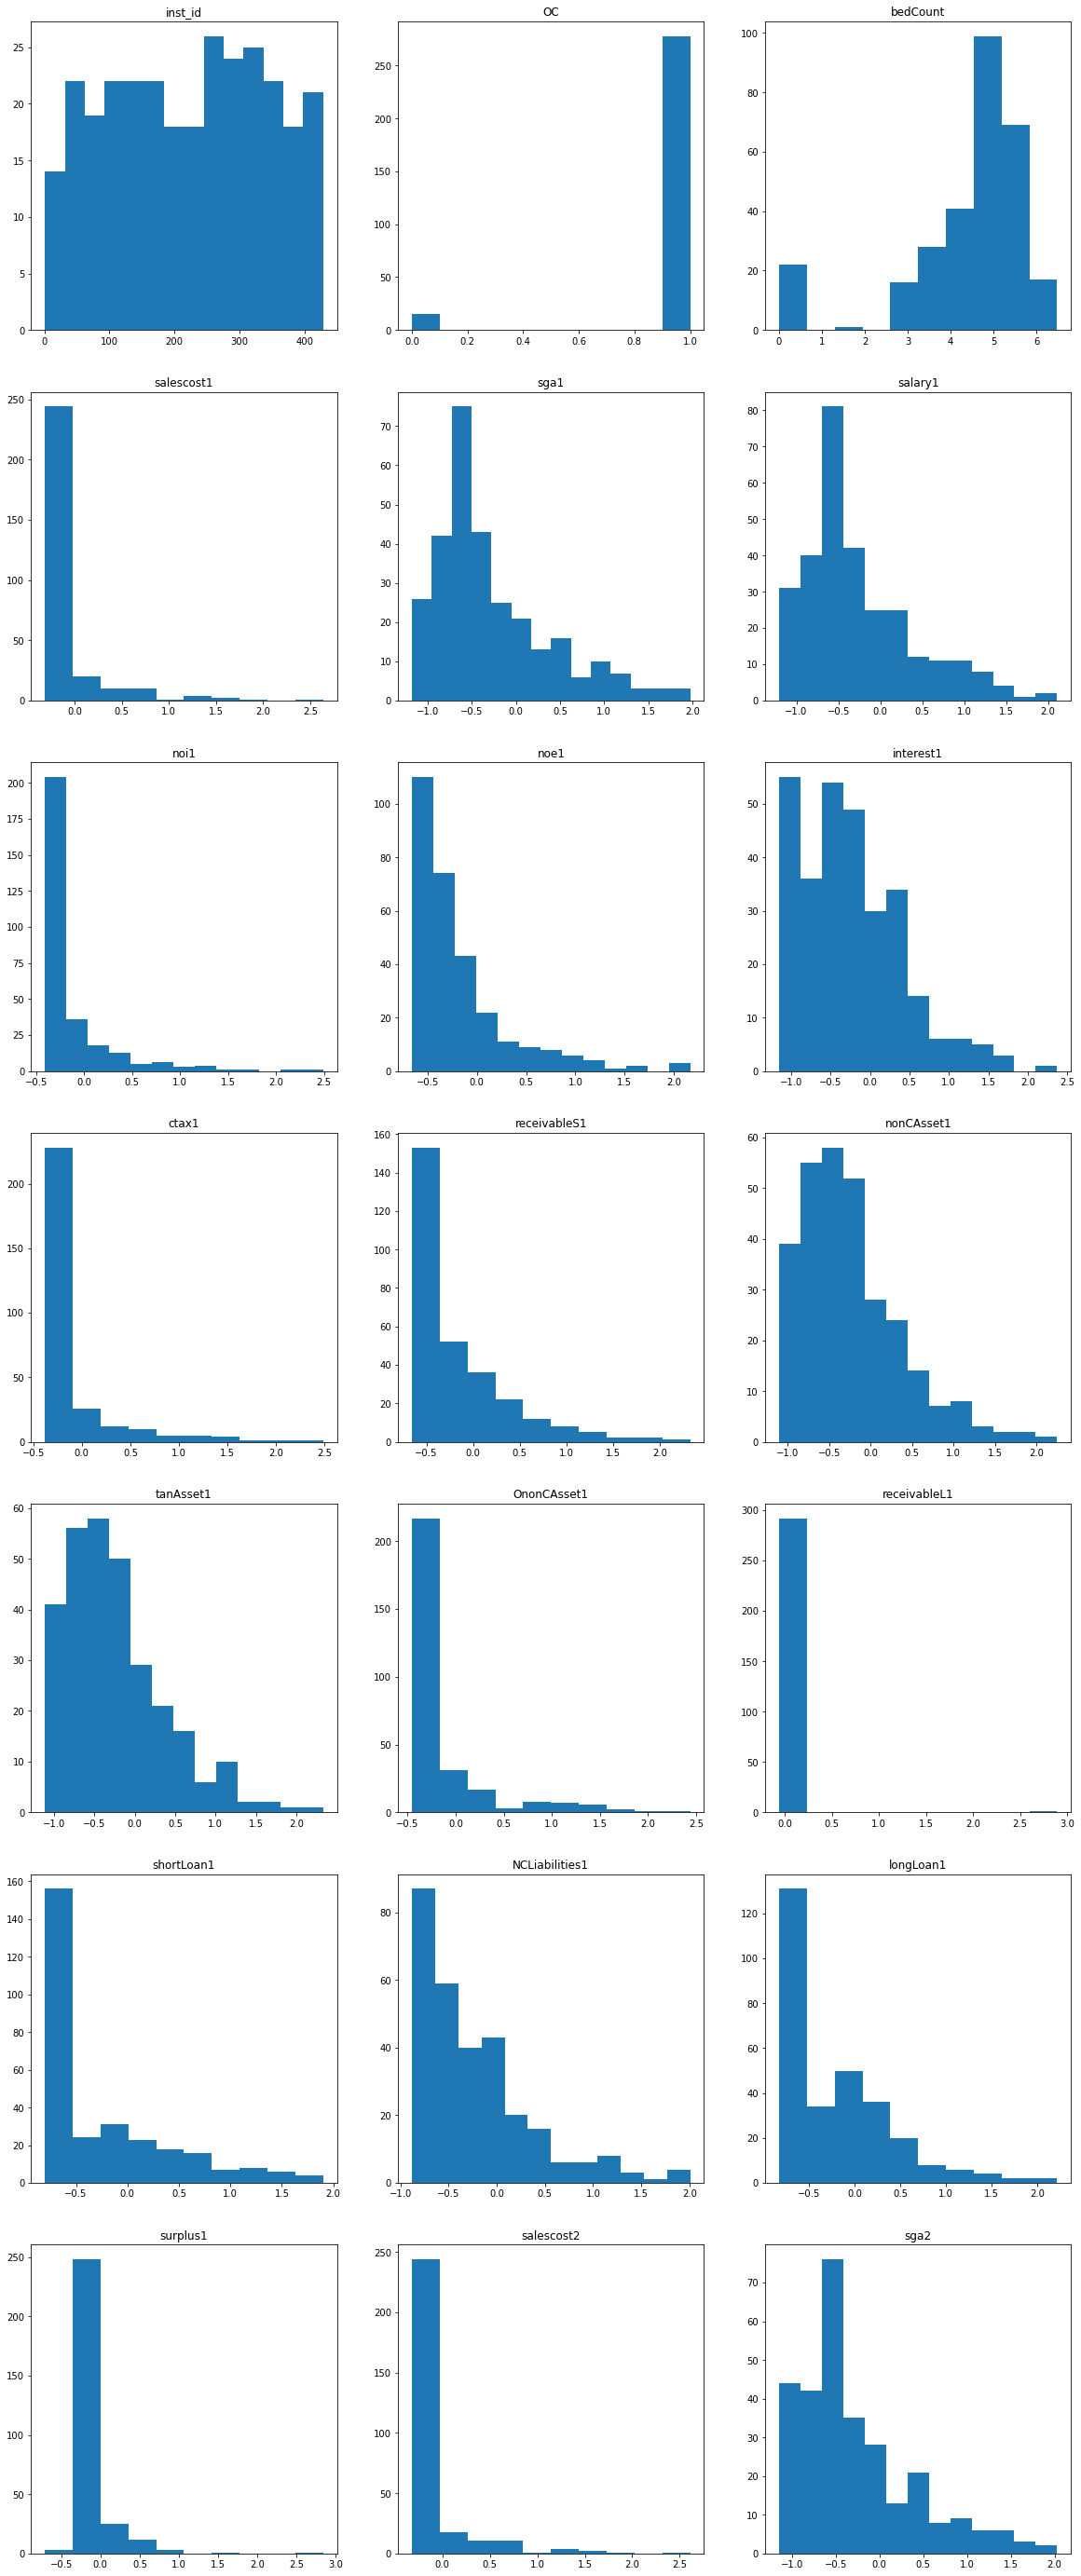

In [313]:
import matplotlib.pyplot as plt

n = 0
f, grid = plt.subplots(7, 3, figsize=(20, 50))
for row in grid:
    for ax in row:
        col = log_train_df.columns[n]
        ax.hist(log_train_df[col], bins=max(log_train_df[col].nunique()//20, 10))
        ax.set_title(col)
        n += 1

In [314]:
log_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   inst_id                        293 non-null    int64   
 1   OC                             293 non-null    int64   
 2   bedCount                       293 non-null    float64 
 3   salescost1                     293 non-null    float64 
 4   sga1                           293 non-null    float64 
 5   salary1                        293 non-null    float64 
 6   noi1                           293 non-null    float64 
 7   noe1                           293 non-null    float64 
 8   interest1                      293 non-null    float64 
 9   ctax1                          293 non-null    float64 
 10  receivableS1                   293 non-null    float64 
 11  nonCAsset1                     293 non-null    float64 
 12  tanAsset1                      293 n

In [315]:
log_train_df['employee2']=np.nan_to_num(log_train_df['employee2'], nan=0, posinf=max(log_train_df['employee2'][np.isfinite(log_train_df['employee2']) == True]), neginf=min(log_train_df['employee2'][np.isfinite(log_train_df['employee2']) == True]), copy=False)
log_train_df['총자산증가율']=np.nan_to_num(log_train_df['총자산증가율'], nan=0, posinf=max(log_train_df['총자산증가율'][np.isfinite(log_train_df['총자산증가율']) == True]), neginf=min(log_train_df['총자산증가율'][np.isfinite(log_train_df['총자산증가율']) == True]), copy=False)
log_train_df['부채비율_17']=np.nan_to_num(log_train_df['부채비율_17'], nan=0, posinf=max(log_train_df['부채비율_17'][np.isfinite(log_train_df['부채비율_17']) == True]), neginf=min(log_train_df['부채비율_17'][np.isfinite(log_train_df['부채비율_17']) == True]), copy=False)
log_train_df['유동자산구성률_17']=np.nan_to_num(log_train_df['유동자산구성률_17'], nan=0, posinf=max(log_train_df['유동자산구성률_17'][np.isfinite(log_train_df['유동자산구성률_17']) == True]), neginf=min(log_train_df['유동자산구성률_17'][np.isfinite(log_train_df['유동자산구성률_17']) == True]), copy=False)


In [311]:
log_train_df.set_index('inst_id',inplace=True)

In [202]:
train_df.set_index('inst_id',inplace=True)

KeyError: "None of ['inst_id'] are in the columns"

In [208]:
#! pip install imblearn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [316]:
X=log_train_df.drop('OC',axis=1)
Y=log_train_df['OC']

In [317]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid=train_test_split(X,Y)

In [318]:
x_train.shape

(219, 81)

In [319]:
y_train.value_counts()

1    207
0     12
Name: OC, dtype: int64

In [126]:
#!pip install imbalanced-learn

In [2]:
#! pip uninstall imblearn

^C


In [3]:
#! pip install imblearn==0.7.0

ERROR: Could not find a version that satisfies the requirement imblearn==0.7.0 (from versions: 0.0)
ERROR: No matching distribution found for imblearn==0.7.0


In [320]:
from imblearn.over_sampling import SMOTENC

In [331]:
smote = SMOTENC(random_state=42, categorical_features=[36])
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [332]:
y_train_smote.value_counts()

1    207
0    207
Name: OC, dtype: int64

In [144]:
#from imblearn.over_sampling import SMOTE

#oversampling_instance=SMOTE(k_neighbors=3)

#o_x_train,o_y_train=oversampling_instance.fit_resample(x_train,y_train)

#o_x_train=pd.DataFrame(o_x_train,columns=X.columns)
#o_y_train=pd.Series(o_y_train)

In [334]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(x_train_smote)
test_features = scaler.transform(x_valid)

In [335]:
len(train_features)

414

In [336]:
train_features

array([[-0.11728761, -0.75422304, -0.22408194, ..., -0.49567826,
        -1.14164833, -1.0430324 ],
       [ 0.19531156, -0.3024847 ,  0.0676575 , ..., -0.86855436,
         1.90186362,  2.19632626],
       [-1.13523874, -0.23101208, -0.42851143, ..., -0.72518865,
        -1.15867827, -1.14515132],
       ...,
       [-1.09516192,  0.60094302, -0.45212506, ..., -0.25354507,
         0.3897602 ,  0.06279527],
       [ 0.49989536, -2.3625989 , -0.32491057, ..., -0.64214974,
        -0.392014  , -0.47281835],
       [-0.78256276,  0.5618327 , -0.48976906, ..., -0.2241512 ,
         0.55218784,  0.33780695]])

In [337]:
np.isnan(train_features)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [338]:
x_train_smote

,inst_id,bedCount,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,receivableS1,...,총자본회전율_17,총자본회전율_16,유동자산집중도_17,유동자산집중도_16,유동자산구성률_17,유동자산구성률_16,당좌비율_17,당좌비율_16,재고자산회전율_17,재고자산회전율_16
0,237,2.944439,-0.231011,-0.911034,-0.891744,-0.410333,-0.659509,-1.150767,-0.380072,-0.177296,...,-0.430407,-0.412861,0.220769,-0.230487,-0.195841,-0.160179,-0.357136,-0.513777,-1.270418,-1.064205
1,276,3.688879,-0.153504,-0.549794,-0.506593,-0.380649,-0.528001,-0.516506,-0.380072,-0.654218,...,1.375357,1.376455,-3.333033,-2.740401,-0.224643,-0.161693,-0.471276,-0.689214,1.083409,1.127079
2,110,3.806662,-0.285321,-0.895648,-0.882689,-0.407699,-0.523945,-0.503887,-0.380072,-0.508243,...,-0.431092,-0.413262,-0.638184,1.909250,-0.214335,-0.160685,-0.456013,-0.621761,-1.283588,-1.133284
3,139,5.075174,-0.283569,-0.572269,-0.517713,-0.326664,-0.070728,-0.656439,-0.208357,-0.296851,...,-0.425089,-0.413262,-0.987794,-2.740401,-0.208553,-0.161693,-0.405828,-0.689214,-0.541833,-1.133284
4,240,4.795791,-0.315460,-0.620297,-0.738174,-0.410370,-0.505778,-0.434974,-0.380072,-0.654218,...,-0.427930,-0.412889,-1.270900,-0.978674,-0.216033,-0.161093,-0.255812,0.487302,1.083409,-0.901556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,96,5.126922,-0.287956,-0.653771,-0.628050,-0.307903,-0.261929,-0.179119,-0.283582,-0.654218,...,-0.034238,-0.026400,-0.424252,-0.188853,-0.159087,-0.156681,-0.323400,-0.464719,0.144418,-0.037163
410,418,5.263781,-0.211238,-0.610485,-0.495919,-0.328019,-0.063823,0.231577,-0.380072,-0.372642,...,0.250222,0.261657,0.718672,-1.132206,0.648999,0.679426,-0.384843,-0.543350,-1.174734,-1.059013
411,115,5.177680,-0.291595,-0.571966,-0.525596,-0.208163,-0.269524,-0.219057,-0.267528,-0.547411,...,-0.422161,-0.410837,0.332954,0.554091,-0.143794,-0.134942,-0.278493,-0.399854,-0.086039,-0.316161
412,314,0.293922,-0.257798,-0.991044,-1.019552,-0.410202,-0.610265,-0.886338,-0.379124,-0.654218,...,-0.336984,-0.412955,-1.110115,-1.235949,-0.216834,-0.161294,-0.380339,-0.582692,-0.690657,-0.678480


In [339]:
x_train_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 81 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   inst_id                        414 non-null    int64   
 1   bedCount                       414 non-null    float64 
 2   salescost1                     414 non-null    float64 
 3   sga1                           414 non-null    float64 
 4   salary1                        414 non-null    float64 
 5   noi1                           414 non-null    float64 
 6   noe1                           414 non-null    float64 
 7   interest1                      414 non-null    float64 
 8   ctax1                          414 non-null    float64 
 9   receivableS1                   414 non-null    float64 
 10  nonCAsset1                     414 non-null    float64 
 11  tanAsset1                      414 non-null    float64 
 12  OnonCAsset1                    414 n

In [340]:
y_train_smote

0      1
1      1
2      1
3      1
4      1
      ..
409    0
410    0
411    0
412    0
413    0
Name: OC, Length: 414, dtype: int64

In [341]:
len(y_train_smote)

414

In [354]:
from sklearn.feature_selection import SelectFromModel

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"))
embeded_lr_selector.fit(x_train_smote, y_train_smote)

C:\Users\ynjn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SelectFromModel(estimator=LogisticRegression())

In [355]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = x_train_smote.iloc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), "selected features")

33 selected features


In [356]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver="liblinear")
logit_reg.fit(x_train_smote[embeded_lr_feature], y_train_smote)

LogisticRegression(C=1e+42, solver='liblinear')

In [357]:
from dmba import classificationSummary

classificationSummary(y_train_smote, logit_reg.predict(x_train_smote[embeded_lr_feature]))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 207   0
     1   0 207


In [358]:
classificationSummary(y_valid, logit_reg.predict(x_valid[embeded_lr_feature]))

Confusion Matrix (Accuracy 0.8784)

       Prediction
Actual  0  1
     0  1  2
     1  7 64


In [342]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_features, y_train_smote)

LogisticRegression()

In [231]:
from sklearn.metrics import accuracy_score

y_pred_tr = model.predict(x_train_smote)
y_pred_valid = model.predict(x_valid)

print("Train Acc :", accuracy_score(y_train_smote, y_pred_tr))
print("Test Acc :", accuracy_score(y_valid, y_pred_valid))

Train Acc : 0.5360576923076923
Test Acc : 0.8648648648648649


C:\Users\ynjn\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\ynjn\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [344]:
from sklearn.metrics import accuracy_score

y_pred_tr = model.predict(x_train_smote)
y_pred_valid = model.predict(x_valid)

print('재무제표 추가')
print("Train Acc :", accuracy_score(y_train_smote, y_pred_tr))
print("Test Acc :", accuracy_score(y_valid, y_pred_valid))

재무제표 추가
Train Acc : 0.4927536231884058
Test Acc : 0.9594594594594594


C:\Users\ynjn\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\ynjn\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [233]:
print(model.score(train_features, y_train_smote))

0.9879807692307693


In [234]:
print(model.score(test_features, y_valid))

0.8918918918918919


In [235]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_smote, y_pred_tr)

array([[ 22, 186],
       [  7, 201]], dtype=int64)

In [345]:
from sklearn.metrics import confusion_matrix
print('재무제표 추가')
confusion_matrix(y_train_smote, y_pred_tr)

재무제표 추가


array([[  0, 207],
       [  3, 204]], dtype=int64)

In [236]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, y_pred_valid)

array([[ 0,  4],
       [ 6, 64]], dtype=int64)

In [346]:
print('재무제표 추가')
confusion_matrix(y_valid, y_pred_valid)

재무제표 추가


array([[ 0,  3],
       [ 0, 71]], dtype=int64)

In [237]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(train_features, y_train_smote)
print("훈련 세트 정확도: {:.3f}".format(tree.score(train_features, y_train_smote)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(test_features, y_valid)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.892


In [347]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(train_features, y_train_smote)
print('재무제표 추가')
print("훈련 세트 정확도: {:.3f}".format(tree.score(train_features, y_train_smote)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(test_features, y_valid)))

재무제표 추가
훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.851


In [238]:
y_pred_tr_proba = tree.predict_proba(train_features)

array([[ 22, 186],
       [  7, 201]], dtype=int64)

In [348]:
y_train_pred = tree.predict(train_features)
y_valid_pred = tree.predict(test_features)

In [240]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_smote, y_train_pred)

array([[208,   0],
       [  0, 208]], dtype=int64)

In [349]:
print('재무제표 추가')
confusion_matrix(y_train_smote, y_train_pred)

재무제표 추가


array([[207,   0],
       [  0, 207]], dtype=int64)

In [241]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_valid, y_valid_pred)

array([[ 1,  3],
       [ 5, 65]], dtype=int64)

In [350]:
print('재무제표 추가')
confusion_matrix(y_valid, y_valid_pred)

재무제표 추가


array([[ 1,  2],
       [ 9, 62]], dtype=int64)

In [359]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier( random_state=0)
model.fit(train_features, y_train_smote)

RandomForestClassifier(random_state=0)

In [245]:
print("훈련 세트 정확도: {:.3f}".format(model.score(train_features, y_train_smote)) )
print("테스트 세트 정확도: {:.3f}".format(model.score(test_features, y_valid)) )

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.919


In [360]:
y_train_pred = model.predict(train_features)
y_valid_pred = model.predict(test_features)

In [247]:
confusion_matrix(y_train_smote, y_train_pred)

array([[208,   0],
       [  0, 208]], dtype=int64)

In [361]:
print('재무제표 추가')
classificationSummary(y_train_smote, y_train_pred)

재무제표 추가
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 207   0
     1   0 207


In [248]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, y_valid_pred)

array([[ 0,  4],
       [ 2, 68]], dtype=int64)

In [362]:
print('재무제표 추가')
classificationSummary(y_valid, y_valid_pred)

재무제표 추가
Confusion Matrix (Accuracy 0.9459)

       Prediction
Actual  0  1
     0  0  3
     1  1 70


In [249]:
train_ori =pd.read_csv('train.csv')

뒤는 clustering 해볼까 한 건데 신경쓰지 않으셔도 됩니다..

In [75]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
sido_df=train_df
sido_df.set_index('sido',inplace=True)
sido_df=sido_df.apply(lambda x: x.astype('float64'))
sido_df=sido_df.groupby('sido').median()
index_st=sido_df[sido_df['OC']==0].index
stores_df=stores_df.drop(index_st)

Z = linkage(stores_df, method='average')

fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(bottom=0.23)
#plt.title('Hierarchical Clustering Dendrogram (Average linkage)')
#plt.xlabel('Company')
dendrogram(Z, labels=stores_df.index, color_threshold=3.6)
plt.axhline(y=200, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

In [258]:
train_lda=train_features[:30]

In [276]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

lda = LinearDiscriminantAnalysis() # LDA 적용, 50차원으로 줄이기 설정
lda.fit(train_features, y_train_smote)
amex_lda = lda.transform(train_features)

print("BEFORE",train_features[:10])
print("BEFORE SHAPE",train_features.shape)

print()

print("AFTER",amex_lda[:10])
print("AFTER SHAPE",amex_lda.shape)

BEFORE [[-1.33334559e+00 -5.02356505e-01 -2.36649910e-01 -5.30771890e-01
  -5.49285908e-01 -2.79881809e-01 -4.73809938e-01 -7.06146475e-01
  -3.64305935e-01 -2.18565526e-01 -6.53978141e-01 -6.51231022e-01
  -5.92857094e-01 -4.37467292e-01 -5.18458546e-01 -4.80334518e-01
  -3.16033386e-01 -2.15996649e-01 -5.77008098e-01 -6.48715873e-01
  -4.94312374e-01 -4.53804885e-01 -4.22337571e-01 -4.16249079e-01
  -2.94698491e-01 -4.93733190e-01 -2.35782926e-01 -5.21955718e-01
  -5.13787222e-01 -4.11527822e-01 -5.20465862e-01 -6.65102399e-01
  -3.71692446e-01 -1.93669601e-01 -6.19318093e-01 -6.19232148e-01
  -5.73016841e-01 -3.64969910e-01 -4.48146237e-01 -4.15328310e-01
  -3.19755172e-01 -2.15996649e-01 -5.40619630e-01 -5.11411206e-01
  -4.15866136e-01 -4.71607576e-01 -4.25603532e-01 -3.38000572e-01
  -2.24470568e-01 -8.81666872e-01 -8.81666872e-01  8.86232320e-01
  -2.24733287e-01 -1.56941205e-01 -3.04507518e-01 -1.48704479e-01
  -1.64804411e-01 -1.40028008e-01 -4.90880694e-02 -6.18998604e-01
  -

In [264]:
y_train_pred = lda.predict(train_features)

In [265]:
y_test_pred = lda.predict(test_features)

In [266]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_smote, y_train_pred)

array([[205,   3],
       [  9, 199]], dtype=int64)

In [268]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, y_test_pred)

array([[ 1,  3],
       [11, 59]], dtype=int64)

In [271]:
from sklearn import svm

clf = svm.SVC()
clf.fit(amex_lda, y_train_smote)

SVC()

In [277]:
amex_lda_test = lda.transform(test_features)

In [278]:
y_train_pred = clf.predict(amex_lda)
y_test_pred = clf.predict(amex_lda_test)

In [279]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_smote, y_train_pred)

array([[204,   4],
       [  6, 202]], dtype=int64)

In [280]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, y_test_pred)

array([[ 0,  4],
       [ 5, 65]], dtype=int64)

In [281]:
from sklearn import svm

clf = svm.SVC()
clf.fit(train_features, y_train_smote)

SVC()

In [282]:
y_train_pred = clf.predict(train_features)
y_test_pred = clf.predict(test_features)

In [283]:
confusion_matrix(y_train_smote, y_train_pred)

array([[207,   1],
       [  5, 203]], dtype=int64)

In [284]:
confusion_matrix(y_valid, y_test_pred)

array([[ 0,  4],
       [ 3, 67]], dtype=int64)